# Test A/B

## **Descripción del ejercicio**

Has recibido una tarea analítica de una tienda en línea internacional. Tus predecesores no consiguieron completarla: lanzaron una prueba A/B y luego abandonaron (para iniciar una granja de sandías en Brasil). Solo dejaron las especificaciones técnicas y los resultados de las pruebas.

### Descripción técnica

- Nombre de la prueba: `recommender_system_test`
- Grupos: А (control), B (nuevo embudo de pago)
- Launch date: 2020-12-07
- Fecha en la que dejaron de aceptar nuevos usuarios: 2020-12-21
- Fecha de finalización: 2021-01-01
- Audiencia: 15% de los nuevos usuarios de la región de la UE
- Propósito de la prueba: probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado
- Resultado esperado: dentro de los 14 días posteriores a la inscripción, los usuarios mostrarán una mejor conversión en vistas de la página del producto (el evento `product_page`), instancias de agregar artículos al carrito de compras (`product_card`) y compras (`purchase`). En cada etapa del embudo `product_page → product_card → purchase`, habrá al menos un 10% de aumento.
- Número previsto de participantes de la prueba: 6 000

Datasets:

- `ab_project_marketing_events_us.csv`: el calendario de eventos de marketing para 2020
- `final_ab_new_users_upd_us.csv`: todos los usuarios que se registraron en la tienda en línea desde el 7 hasta el 21 de diciembre de 2020
- `final_ab_events_upd_us.csv`: todos los eventos de los nuevos usuarios en el período comprendido entre el 7 de diciembre de 2020 y el 1 de enero de 2021
- `final_ab_participants_upd_us.csv`: tabla con los datos de los participantes de la prueba

Estructura `ab_project_marketing_events_us.csv`:

- `name`: el nombre del evento de marketing
- `regions`: regiones donde se llevará a cabo la campaña publicitaria
- `start_dt`: fecha de inicio de la campaña
- `finish_dt`: fecha de finalización de la campaña

Estructura `final_ab_new_users_upd_us.csv`:

- `user_id`
- `first_date`: fecha de inscripción
- `region`
- `device`: dispositivo utilizado para la inscripción

Estructura `final_ab_events_upd_us.csv`:

- `user_id`
- `event_dt`: fecha y hora del evento
- `event_name`: nombre del tipo de evento
- `details`: datos adicionales sobre el evento (por ejemplo, el pedido total en USD para los eventos `purchase`)

Estructura `final_ab_participants_upd_us.csv`:

- `user_id`
- `ab_test`: nombre de la prueba
- `group`: el grupo de prueba al que pertenecía el usuario


### Instrucciones para completar la tarea

- Describe los objetivos del estudio.
- Explora los datos:
    - ¿Es necesario convertir los tipos?
    - ¿Hay valores ausentes o duplicados? Si es así, ¿cómo los caracterizarías?
- Lleva a cabo el análisis exploratorio de datos:
    - Estudia la conversión en las diferentes etapas del embudo.
    - ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?
    - ¿Hay usuarios que están presentes en ambas muestras?
    - ¿Cómo se distribuye el número de eventos entre los días?
    - ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?
- Evaluar los resultados de la prueba A/B:
    - ¿Qué puedes decir sobre los resultados de la prueba A/B?
    - Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones
- Describe tus conclusiones con respecto a la etapa EDA y los resultados de la prueba A/B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nuevos_usuarios = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
participantes = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')
eventos = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
projectos_marketin = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')

# Preprocesamiento de datos

### Analisis exploratorio Dataset nuevos_usuarios

In [3]:
print(nuevos_usuarios.shape)
nuevos_usuarios.head()

(58703, 4)


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [4]:
print(nuevos_usuarios.describe(),'\n')
print(nuevos_usuarios.info())

                 user_id  first_date region   device
count              58703       58703  58703    58703
unique             58703          17      4        4
top     97AFF66048C63F0C  2020-12-21     EU  Android
freq                   1        6077  43396    26159 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
None


In [5]:
# Convertir la columna 'first_date' a tipo datetime
nuevos_usuarios['first_date'] = pd.to_datetime(nuevos_usuarios['first_date'], format='%Y-%m-%d')

In [6]:
print(nuevos_usuarios['user_id'].nunique())

58703


In [7]:
### Analisis exploratorio Dataset participantes

In [8]:
print(participantes.shape)
participantes.head()

(14525, 3)


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [9]:
print(participantes.describe(),'\n')
print(participantes.info())

                 user_id  group            ab_test
count              14525  14525              14525
unique             13638      2                  2
top     D649423E43336656      A  interface_eu_test
freq                   2   8214              10850 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB
None


In [10]:
print(participantes.groupby('group').size())
print(participantes['user_id'].nunique())

group
A    8214
B    6311
dtype: int64
13638


In [11]:
# Duplicados
print(participantes.duplicated().sum())

0


In [12]:
# Usuarios en ambos grupos
usuarios_grupos = participantes.groupby('user_id')['group'].nunique().reset_index()
usuarios_en_ambos = usuarios_grupos[usuarios_grupos['group'] > 1]['user_id']
print(usuarios_en_ambos.count())

441


In [13]:
conteo = participantes['user_id'].value_counts()

# Filtrar los que aparecen solo una vez
usuarios_unicos = conteo[conteo == 1].index

# Quedarse con los registros cuyos user_id aparecen solo una vez
participantes_filtrado = participantes[participantes['user_id'].isin(usuarios_unicos)]

print(participantes_filtrado.shape)

print(participantes_filtrado.info())

(12751, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12751 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  12751 non-null  object
 1   group    12751 non-null  object
 2   ab_test  12751 non-null  object
dtypes: object(3)
memory usage: 398.5+ KB
None


Se identificaron participantes en ambos grupos, asi que se seleccionaron a los participantes que aparecen una sola vez

### Analisis exploratorio Dataset eventos

In [14]:
print(eventos.shape)
print(eventos.head())

(423761, 4)
            user_id             event_dt event_name  details
0  E1BDDCE0DAFA2679  2020-12-07 20:22:03   purchase    99.99
1  7B6452F081F49504  2020-12-07 09:22:53   purchase     9.99
2  9CD9F34546DF254C  2020-12-07 12:59:29   purchase     4.99
3  96F27A054B191457  2020-12-07 04:02:40   purchase     4.99
4  1FD7660FDF94CA1F  2020-12-07 10:15:09   purchase     4.99


In [15]:
# Convertir la columna 'event_dt' a tipo datetime
eventos['event_dt'] = pd.to_datetime(eventos['event_dt'])

In [16]:
print(eventos.describe(),'\n')
print(eventos.drop('details', axis=1).describe(),'\n')
print(eventos.info())

            details
count  60314.000000
mean      23.881219
std       72.228884
min        4.990000
25%        4.990000
50%        4.990000
75%        9.990000
max      499.990000 

                 user_id             event_dt event_name
count             423761               423761     423761
unique             58703               257138          4
top     A3917F81482141F2  2020-12-14 18:54:55      login
freq                  36                   10     182465
first                NaN  2020-12-07 00:00:33        NaN
last                 NaN  2020-12-30 23:36:33        NaN 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datet

In [17]:
print(eventos['event_name'].unique())
print(eventos[eventos['event_name'] == 'purchase'].count())

['purchase' 'product_cart' 'product_page' 'login']
user_id       60314
event_dt      60314
event_name    60314
details       60314
dtype: int64


Se observo una gran cantidad de valores no nulos en la columna 'details', sin embargo, no son verdaderos valores no nulos, esta columna corresponde a ingresos obtenidos en ese evento, y solo el evento 'purchase' genera ingresos

In [18]:
eventos_r= eventos
eventos_r['details'] = eventos_r['details'].fillna(0)

In [19]:
print(eventos_r['details'].unique())
print(eventos_r['details'].describe())

[ 99.99   9.99   4.99 499.99   0.  ]
count    423761.000000
mean          3.399019
std          28.498201
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         499.990000
Name: details, dtype: float64


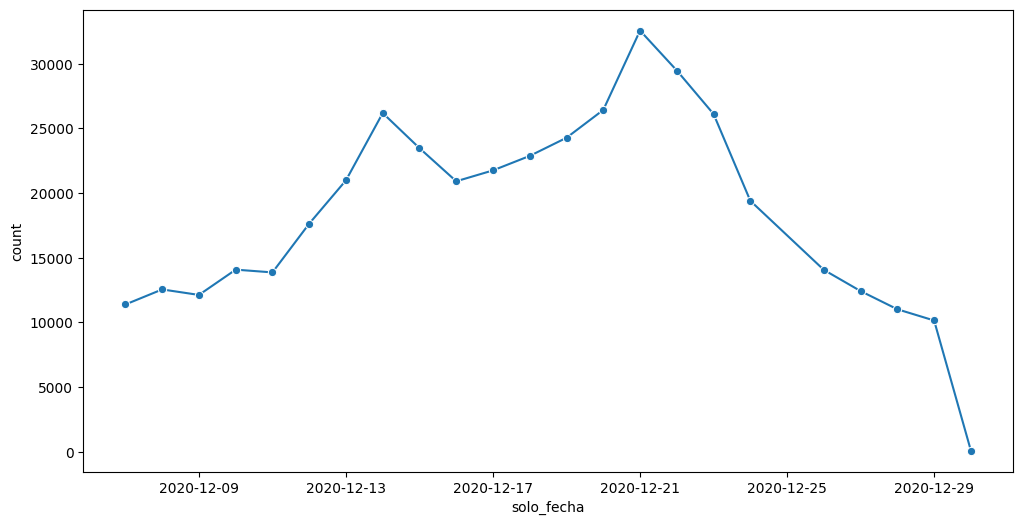

In [20]:
eventos_r['solo_fecha'] = eventos_r['event_dt'].dt.date

conteo = eventos_r.groupby('solo_fecha').size().reset_index(name='count')

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(data=conteo, x='solo_fecha', y='count', marker='o')
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [20]</b> <a class="tocSkip"></a><br>
La visualización de la cantidad de eventos a lo largo del tiempo es una excelente manera de identificar patrones temporales en los datos. Esto puede proporcionar información valiosa sobre el comportamiento de los usuarios y ayudarte a detectar tendencias o anomalías en la actividad de los eventos.
</div>


### Analisis exploratorio Dataset projectos_marketin

In [21]:
print(projectos_marketin.shape)
projectos_marketin.head(14)

(14, 4)


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [22]:
print(projectos_marketin.describe(),'\n')
print(projectos_marketin.info())

                          name regions    start_dt   finish_dt
count                       14      14          14          14
unique                      14       6          14          14
top     Chinese New Year Promo    APAC  2020-02-14  2020-02-07
freq                         1       4           1           1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
None


In [23]:
# Convertir las columnas de fecha a tipo datetime
projectos_marketin['start_dt'] = pd.to_datetime(projectos_marketin['start_dt'], format='%Y-%m-%d')
projectos_marketin['finish_dt'] = pd.to_datetime(projectos_marketin['finish_dt'], format='%Y-%m-%d')

In [24]:
projectos_marketin['regions'] = projectos_marketin['regions'].str.split(',\s*')  # Separar por coma y espacios

# Explota la columna 'regions' para crear una fila por región
projectos_marketin_transform = projectos_marketin.explode('regions').reset_index(drop=True)

In [25]:
print(projectos_marketin_transform.shape)
print(projectos_marketin_transform['regions'].unique())

(29, 4)
['EU' 'N.America' 'CIS' 'APAC']


In [26]:
# renombrar la columna 'regions' a 'region'
projectos_marketin_transform.rename(columns={'regions': 'region'}, inplace=True)
print(projectos_marketin_transform.columns)

Index(['name', 'region', 'start_dt', 'finish_dt'], dtype='object')


## Conclusiones
Se identificaron usuarios que estan en ambos grupos, adicionalmente se observo una mayor cantidad de usuarios en el grupo A que en el grupo B, con una diferencia de casi 1900 usuarios, casi 1/3 mas grande que el grupo B. Adicionalmente, se obserbo un incremento en el numero de eventos, presentando dos grandes picos en el dia 12 y 21 (El mayor pico) del mes de diciembre, posteriormente se presento un caida en el numero de eventos hasta alcanzar el menor numero de eventos en el dia 29. Cabe mencionar que la fecha en la que se realizó la prueba A/B no es apropiada, debido a los dias festivos que pueden alterar los resultados, dado que la prueba A/B busca mejorar la el sistema de recomendaciones, no tiene sentido realizar esta prueba. Si la prueba A/B buscara comparar el numero de ventas o visitas en la tienda comparando la pagina base con la pagina adaptada a imagen de las fiestas, podria tener sentido realizar una pueba A/B

In [27]:
## Union de dataframes# Union de los DataFrames
usuarios_participantes_merged = pd.merge(participantes_filtrado, nuevos_usuarios, on='user_id', how='inner')
print(usuarios_participantes_merged.info())
print(usuarios_participantes_merged.groupby('device')['group'].describe())
# Union de eventos con participantes filtrados
UPV_merged = pd.merge(usuarios_participantes_merged, eventos, on='user_id', how='inner')
print(UPV_merged.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12751 entries, 0 to 12750
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     12751 non-null  object        
 1   group       12751 non-null  object        
 2   ab_test     12751 non-null  object        
 3   first_date  12751 non-null  datetime64[ns]
 4   region      12751 non-null  object        
 5   device      12751 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 697.3+ KB
None
        count unique top  freq
device                        
Android  5730      2   A  3134
Mac      1278      2   A   703
PC       3239      2   A  1843
iPhone   2504      2   A  1413
<class 'pandas.core.frame.DataFrame'>
Int64Index: 91408 entries, 0 to 91407
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     91408 non-null  object        
 1 

In [28]:
print(UPV_merged.describe())
print(UPV_merged['device'].unique())

            details
count  91408.000000
mean       3.404219
std       28.453075
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      499.990000
['PC' 'iPhone' 'Mac' 'Android']


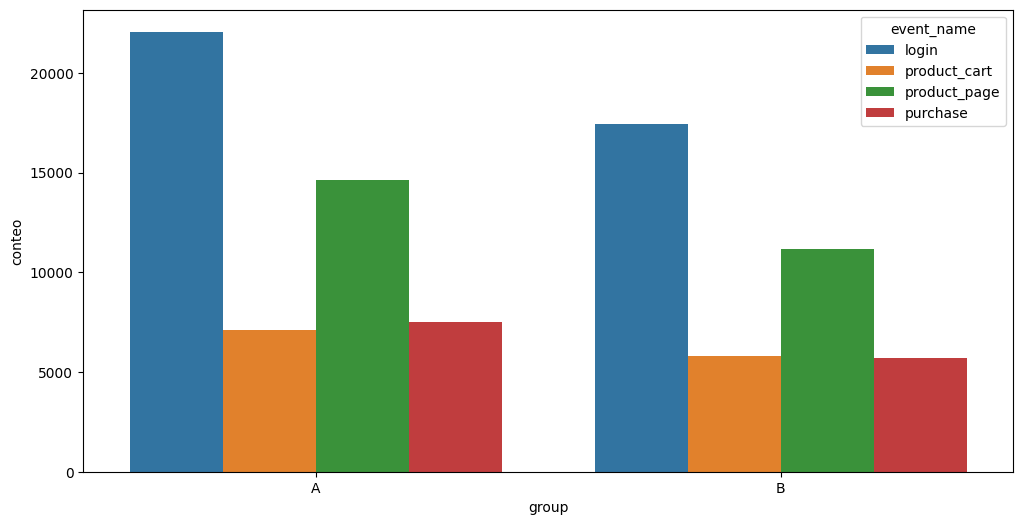

  group    event_name  conteo
0     A         login   22073
1     A  product_cart    7122
2     A  product_page   14635
3     A      purchase    7520
4     B         login   17424
5     B  product_cart    5790
6     B  product_page   11150
7     B      purchase    5694


In [29]:
group_AB = UPV_merged.groupby(['group', 'event_name'])['event_name'].size().reset_index(name='conteo')

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=group_AB, x='group', y= 'conteo', hue='event_name')
plt.show()
print(group_AB)

<div class="alert alert-block alert-success">
<b>Celda [29]</b> <a class="tocSkip"></a><br>
La comparación de la cantidad de eventos entre los grupos A y B mediante un gráfico de barras es una excelente manera de visualizar las diferencias. Esto ayuda a destacar las variaciones en el comportamiento de los grupos, lo que es fundamental para evaluar el impacto de las pruebas A/B.
</div>


In [30]:
print(group_AB.sort_values(by= 'conteo', ascending = False))

  group    event_name  conteo
0     A         login   22073
4     B         login   17424
2     A  product_page   14635
6     B  product_page   11150
3     A      purchase    7520
1     A  product_cart    7122
5     B  product_cart    5790
7     B      purchase    5694


Se observó algo raro en los datos, en el grupo A hay un mayor numero de eventos 'Purchanse' que eventos 'Product_cart', algo no posible dado que para realizar una compra hay que agregar un producto al carrito antes

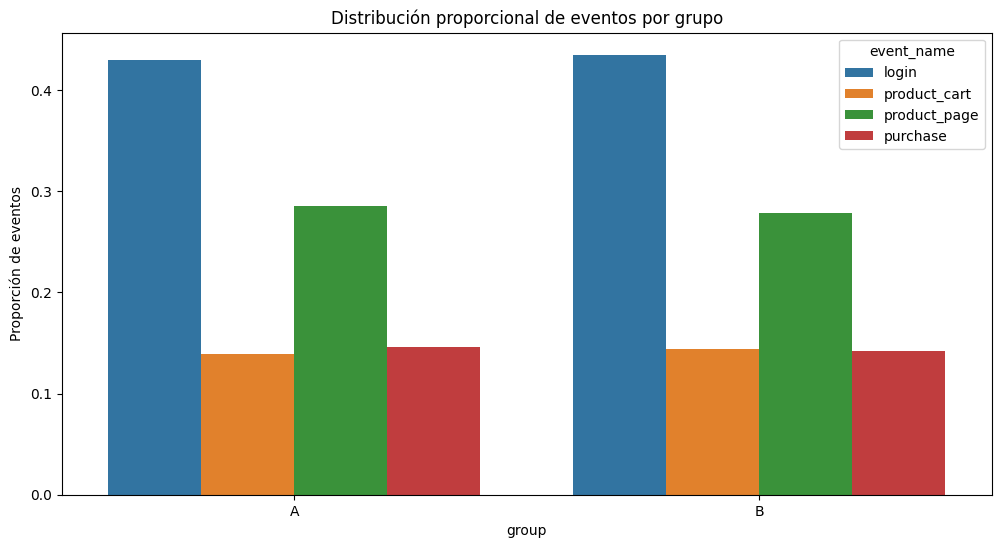

In [31]:
group_AB['proporcion'] = group_AB['conteo'] / group_AB.groupby('group')['conteo'].transform('sum')

plt.figure(figsize=(12, 6))
sns.barplot(data=group_AB, x='group', y='proporcion', hue='event_name')
plt.ylabel('Proporción de eventos')
plt.title('Distribución proporcional de eventos por grupo')
plt.show()


In [32]:
UPVM_merged = pd.merge(UPV_merged, projectos_marketin_transform, on='region', how='inner')
region_to_tz = {
    'N.America': 'America/New_York',
    'EU': 'Europe/Berlin',
    'CIS': 'Europe/Moscow',
    'APAC': 'Asia/Shanghai'
}
UPVM_merged['event_dt'] = pd.to_datetime(UPVM_merged['event_dt'])

# Crear columna con zona horaria por región
UPVM_merged['timezone'] = UPVM_merged['region'].map(region_to_tz)

# Localizar como UTC (si no tiene tz aún) y convertir a la tz real
UPVM_merged['event_dt_local'] = UPVM_merged.apply(
    lambda row: row['event_dt'].tz_localize('UTC').tz_convert(row['timezone']),
    axis=1
)
print(UPVM_merged['event_dt_local'].head())
print(UPVM_merged['event_dt_local'].dtype)


0    2020-12-07 15:43:27+01:00
1    2020-12-07 15:43:27+01:00
2    2020-12-07 15:43:27+01:00
3    2020-12-07 15:43:27+01:00
4    2020-12-07 15:43:27+01:00
Name: event_dt_local, dtype: object
object


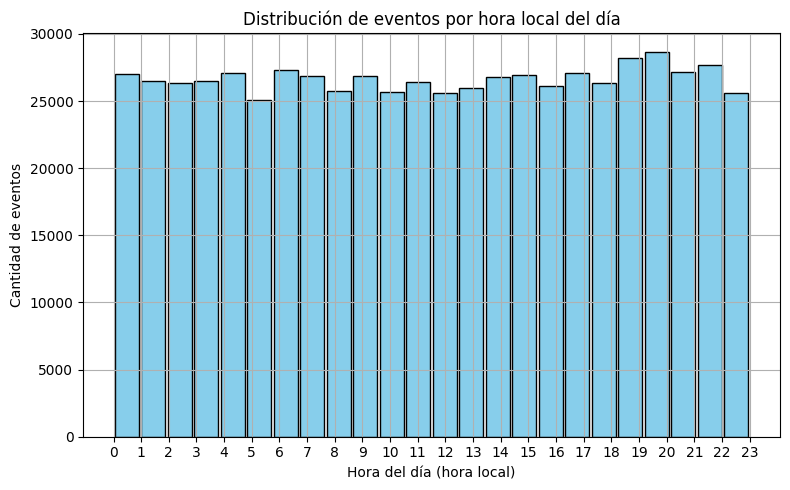

In [33]:
UPVM_merged['event_dt_local'] = pd.to_datetime(UPVM_merged['event_dt_local'], utc=True)
UPVM_merged['Hour'] = UPVM_merged['event_dt_local'].dt.hour

# Graficar histograma
plt.figure(figsize=(8, 5))
UPVM_merged['Hour'].plot(kind='hist', bins=24, rwidth=0.9, color='skyblue', edgecolor='black')

plt.title("Distribución de eventos por hora local del día")
plt.xlabel("Hora del día (hora local)")
plt.ylabel("Cantidad de eventos")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
distribucion_eventos = UPVM_merged.groupby('event_name')['user_id'].count()
print(distribucion_eventos.sort_values(ascending = False))

event_name
login           276369
product_page    180385
purchase         92386
product_cart     90362
Name: user_id, dtype: int64


In [35]:
proporcion_eventos = (distribucion_eventos / distribucion_eventos['login'])*100
print(proporcion_eventos.sort_values(ascending = False))

event_name
login           100.000000
product_page     65.269621
purchase         33.428496
product_cart     32.696142
Name: user_id, dtype: float64


In [36]:
print(UPVM_merged.shape)

(639502, 16)


# Evaluacion de resultados de prueba A/B

In [37]:
print(UPVM_merged.columns)

Index(['user_id', 'group', 'ab_test', 'first_date', 'region', 'device',
       'event_dt', 'event_name', 'details', 'solo_fecha', 'name', 'start_dt',
       'finish_dt', 'timezone', 'event_dt_local', 'Hour'],
      dtype='object')


In [38]:
ventas_filtradas = UPVM_merged[UPVM_merged['event_name'] == 'purchase']
datesGroups = ventas_filtradas[['solo_fecha', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: ventas_filtradas[np.logical_and(ventas_filtradas['solo_fecha'] <= x['solo_fecha'], ventas_filtradas['group'] == x['group'])].agg({
        'solo_fecha':'max',
        'group':'max',
        'user_id':pd.Series.nunique,
        'details':'sum'}), axis=1).sort_values(by=['solo_fecha', 'group'])

In [39]:
visitorsAggregated = datesGroups.apply(
    lambda x: ventas_filtradas[np.logical_and(ventas_filtradas['solo_fecha'] <= x['solo_fecha'], ventas_filtradas['group'] == x['group'])].agg({
        'solo_fecha':'max',
        'group':'max',
        'user_id':'sum'}), axis=1).sort_values(by=['solo_fecha', 'group'])

In [40]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on = ['solo_fecha', 'group'], right_on = ['solo_fecha', 'group'])

In [41]:
cumulativeData.columns = [
    'date',
    'group',
    'buyers',
    'revenue',
    'visitors'
]

In [42]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'visitors']]

cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'visitors']]

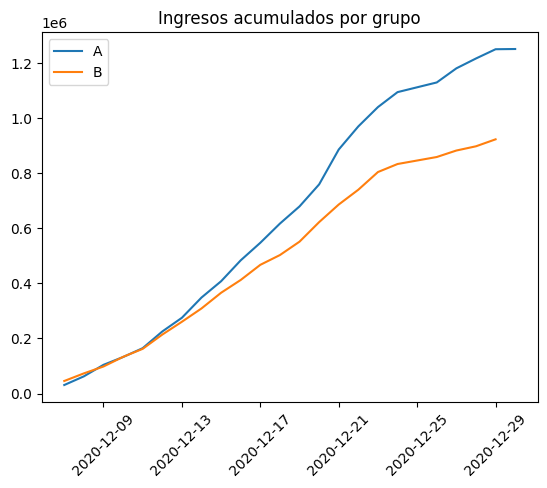

In [43]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B')
plt.title('Ingresos acumulados por grupo')
plt.xticks(rotation=45)
plt.legend()

### Comparacion de grupos

In [44]:
grupo_A= UPVM_merged[UPVM_merged['group'] == 'A']

grupo_B= UPVM_merged[UPVM_merged['group'] == 'B']

In [45]:
usuarios_A = grupo_A['user_id'].nunique()
usuarios_B = grupo_B['user_id'].nunique()

conv_A = grupo_A[grupo_A['event_name'] == 'purchase']['user_id'].nunique()
conv_B = grupo_B[grupo_B['event_name'] == 'purchase']['user_id'].nunique()

tasa_A = conv_A / usuarios_A
tasa_B = conv_B / usuarios_B

In [46]:
from statsmodels.stats.proportion import proportions_ztest

# Valores para la prueba
successes = [conv_A, conv_B]
n_obs = [usuarios_A, usuarios_B]

stat, pval = proportions_ztest(count=successes, nobs=n_obs)

print(f"Tasa de conversión grupo A: {tasa_A:.4f}")
print(f"Tasa de conversión grupo B: {tasa_B:.4f}")
print(f"Estadístico z: {stat:.4f}, valor p: {pval:.4f}")

Tasa de conversión grupo A: 0.3432
Tasa de conversión grupo B: 0.3271
Estadístico z: 1.9012, valor p: 0.0573


In [47]:
def comparar_evento(event_name, grupo_A, grupo_B, usuarios_A, usuarios_B):
    # Usuarios únicos que realizaron el evento en cada grupo
    conv_A = grupo_A[grupo_A['event_name'] == event_name]['user_id'].nunique()
    conv_B = grupo_B[grupo_B['event_name'] == event_name]['user_id'].nunique()

    # Tasa de conversión por grupo
    prop_A = conv_A / usuarios_A
    prop_B = conv_B / usuarios_B

    # Prueba z para comparar proporciones
    stat, pval = proportions_ztest([conv_A, conv_B], [usuarios_A, usuarios_B])

    return {
        'Evento': event_name,
        'Usuarios_Grupo_A': conv_A,
        'Usuarios_Grupo_B': conv_B,
        'Proporcion_Grupo_A': prop_A,
        'Proporcion_Grupo_B': prop_B,
        'Z': stat,
        'p-value': pval
    }

In [48]:
eventos = grupo_A['event_name'].unique() 

resultados = [comparar_evento(e, grupo_A, grupo_B, usuarios_A, usuarios_B) for e in eventos]

df_resultados = pd.DataFrame(resultados)

In [49]:
df_significativos = df_resultados[df_resultados['p-value'] < 0.05]

if df_significativos.empty:
    print("No hay diferencias estadísticamente significativas entre los grupos A y B.")
else:
    print("Se encontraron diferencias significativas:")
    print(df_significativos)

Se encontraron diferencias significativas:
         Evento  Usuarios_Grupo_A  Usuarios_Grupo_B  Proporcion_Grupo_A  \
2  product_page              4726              3651            0.666291   

   Proporcion_Grupo_B         Z   p-value  
2            0.645281  2.482874  0.013033  


<div class="alert alert-block alert-warning">
<b>Celda [49]</b> <a class="tocSkip"></a><br>
Has identificado diferencias significativas en el evento 'product_page'. Sería beneficioso discutir las posibles razones detrás de estas diferencias y su impacto en el negocio, ya que esto podría ofrecer oportunidades para optimizar aún más el proceso de conversión.
</div>


In [50]:
print(df_resultados.head())

         Evento  Usuarios_Grupo_A  Usuarios_Grupo_B  Proporcion_Grupo_A  \
0      purchase              2434              1851            0.343155   
1  product_cart              2260              1881            0.318624   
2  product_page              4726              3651            0.666291   
3         login              7092              5657            0.999859   

   Proporcion_Grupo_B         Z   p-value  
0            0.327147  1.901237  0.057271  
1            0.332450 -1.656340  0.097653  
2            0.645281  2.482874  0.013033  
3            0.999823  0.160186  0.872735  


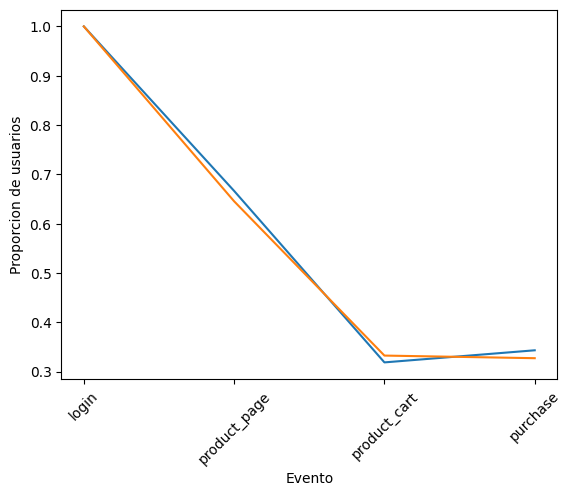

In [51]:
df_resultados = df_resultados.sort_values(by = 'Usuarios_Grupo_B', ascending = False)
x = df_resultados['Evento']

plt.plot(x, df_resultados['Proporcion_Grupo_A'])
plt.plot(x, df_resultados['Proporcion_Grupo_B'])
plt.xlabel('Evento')
plt.ylabel('Proporcion de usuarios')
plt.xticks(rotation=45)
plt.show()

In [52]:
# Analisis de usuarios duplicados
conteo = participantes['user_id'].value_counts()
usuarios_duplicados = conteo[conteo >= 2].index

# Quedarse con los registros cuyos user_id aparecen solo una vez
participantes_duplicados = participantes[participantes['user_id'].isin(usuarios_duplicados)]

In [53]:
print(participantes_duplicados.shape)

(1774, 3)


In [54]:
duplicados_merged = pd.merge(participantes_duplicados, eventos_r, on='user_id', how='inner')
print(participantes_duplicados['user_id'].nunique())
print(participantes_duplicados['user_id'].count())

887
1774


In [55]:
print(duplicados_merged.groupby(['group','event_name'])['event_name'].count())

group  event_name  
A      login           3321
       product_cart     901
       product_page    2034
       purchase        1099
B      login           1887
       product_cart     505
       product_page    1142
       purchase         541
Name: event_name, dtype: int64


## Conclusión
Tanto el grupo A como el grupo B presentaron una distribucion de eventos similar, sin embargo el grupo A es considerablemente mas grande, sin embargo, el grupo A presenta presenta anomalias en sus eventos, dado que se observo una mayor cantidad de compras que agrega de productos al carrito despues de filtrar los usuarios presentes en ambos grupos, algo no posible. Tras observar el grupo de usuarios que estaba en ambos grupos, puedo sugerir que posiblemente hubo algun problema en la segmentacion de grupos, y que algunos usuarios realizaron algunos eventos dentro de un grupo y las finalizaron en el otro, ejemplo, añadir productos al carrito en el grupo B y realizar el pago en el grupo A. Si bien el grupo A parecio presentar una diferencia significativa en su tasa de retension, debido a los errores presentados en la prueba no se pueden considerar confiables

# Analisis individual por dispositivo

In [77]:
print(UPVM_merged['device'].unique())

['PC' 'iPhone' 'Mac' 'Android']


In [56]:
pc_df = UPVM_merged[UPVM_merged['device'] == 'PC']

iphone_df = UPVM_merged[UPVM_merged['device'] == 'iPhone']

mac_df = UPVM_merged[UPVM_merged['device'] == 'Mac']

android_df = UPVM_merged[UPVM_merged['device'] == 'Android']

In [57]:
def graf(df, group, event, dispositivo):
    group_AB = UPV_merged.groupby(['group', 'event_name'])['event_name'].size().reset_index(name='conteo')
    artefacto = df[dispositivo].unique()
    # Graficar
    plt.figure(figsize=(12, 6))
    sns.barplot(data=group_AB, x='group', y= 'conteo', hue='event_name')
    plt.title(f'Comparativa grupos A/B del dispositivo: {artefacto}')
    plt.show()
    print(group_AB.sort_values(by = 'conteo', ascending=False))
    return plt.show()

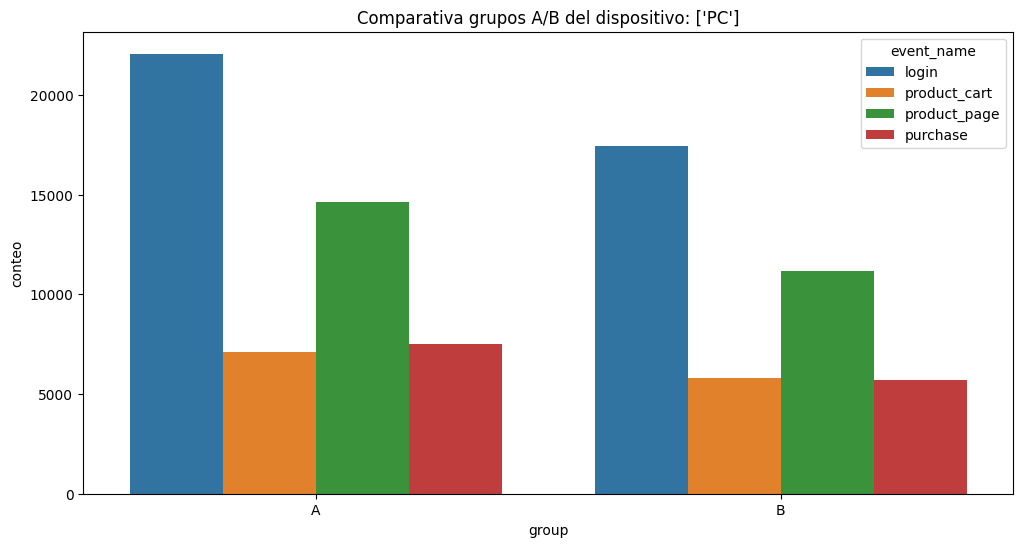

  group    event_name  conteo
0     A         login   22073
4     B         login   17424
2     A  product_page   14635
6     B  product_page   11150
3     A      purchase    7520
1     A  product_cart    7122
5     B  product_cart    5790
7     B      purchase    5694


In [58]:
graf(pc_df, 'group', 'event_name', 'device')

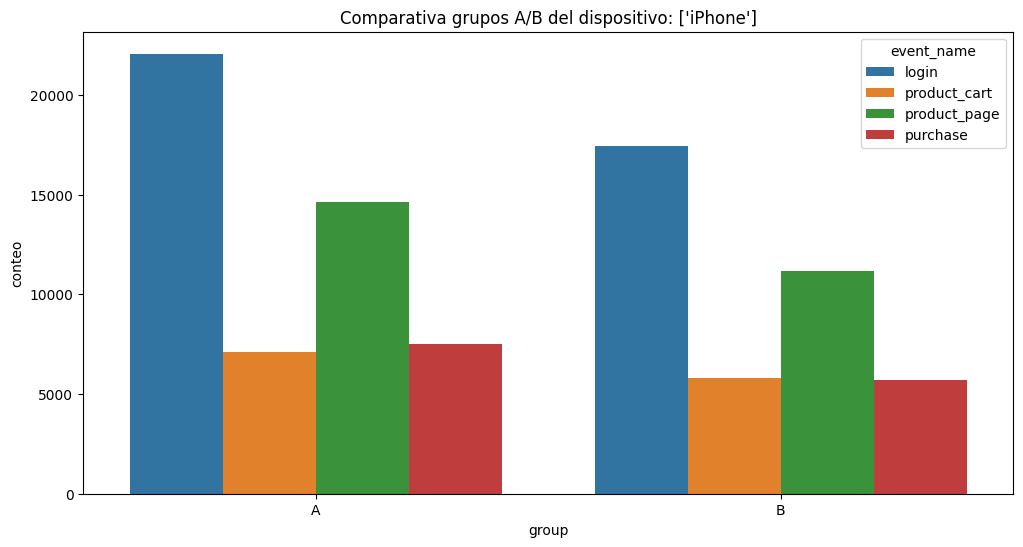

  group    event_name  conteo
0     A         login   22073
4     B         login   17424
2     A  product_page   14635
6     B  product_page   11150
3     A      purchase    7520
1     A  product_cart    7122
5     B  product_cart    5790
7     B      purchase    5694


In [59]:
graf(iphone_df, 'group', 'event_name', 'device')

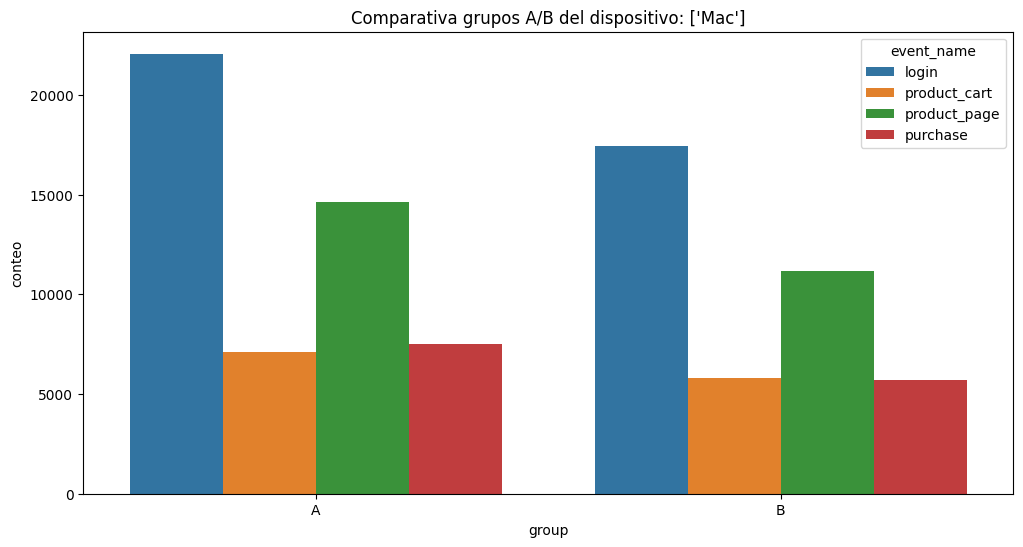

  group    event_name  conteo
0     A         login   22073
4     B         login   17424
2     A  product_page   14635
6     B  product_page   11150
3     A      purchase    7520
1     A  product_cart    7122
5     B  product_cart    5790
7     B      purchase    5694


In [60]:
graf(mac_df, 'group', 'event_name', 'device')

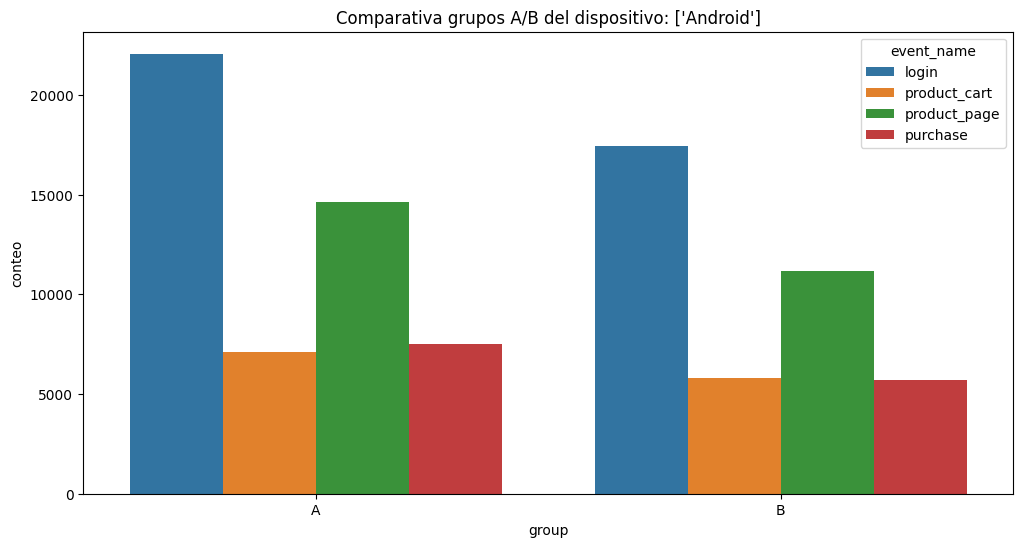

  group    event_name  conteo
0     A         login   22073
4     B         login   17424
2     A  product_page   14635
6     B  product_page   11150
3     A      purchase    7520
1     A  product_cart    7122
5     B  product_cart    5790
7     B      purchase    5694


In [61]:
graf(android_df, 'group', 'event_name', 'device')

In [78]:
def grupos(df, x):
    grupo_x= df[df['group'] == x]
    return grupo_x


In [79]:
# Grupos A/B de PC
pc_df_A = grupos(pc_df, 'A')
pc_df_B = grupos(pc_df, 'B')

print(pc_df_A['event_name'].nunique())
print(pc_df_A['group'].nunique(), pc_df_A['group'].unique())
print(pc_df_A.shape)
print(pc_df_A['device'].nunique(), pc_df_A['device'].unique())


4
1 ['A']
(92285, 16)
1 ['PC']


In [80]:
# Grupos A/B de iPhone
iphone_df_A = grupos(iphone_df, 'A')
iphone_df_B = grupos(iphone_df, 'B')
# Grupos A/B de Mac
mac_df_A = grupos(mac_df, 'A')
mac_df_B = grupos(mac_df, 'B')
# Grupos A/B de iPhone
android_df_A = grupos(android_df, 'A')
android_df_B = grupos(android_df, 'B')

In [90]:
print(mac_df_A['event_name'].nunique())
print(mac_df_A['group'].nunique(), mac_df_A['group'].unique())
print(mac_df_A.shape)
print(mac_df_A['device'].nunique(), mac_df_A['device'].unique())


4
1 ['A']
(36789, 16)
1 ['Mac']


In [92]:
print(mac_df_B['event_name'].nunique())
print(mac_df_B['group'].nunique(), mac_df_B['group'].unique())
print(mac_df_B.shape)
print(mac_df_B['device'].nunique(), mac_df_B['device'].unique())


4
1 ['B']
(29088, 16)
1 ['Mac']


In [83]:
def formula2(df_A, df_B, usario, evento):
    us_A = df_A[usario].nunique()
    us_B = df_B[usario].nunique()

    con_A = df_A[df_A[evento] == 'purchase'][usario].nunique()
    con_B = df_B[df_B[evento] == 'purchase'][usario].nunique()
    
    tas_A = con_A / us_A
    tas_B = con_B / us_B
    # Valores para la prueba
    succe = [con_A, con_B]
    n_ob = [us_A, us_B]

    stat, pval = proportions_ztest(count=succe, nobs=n_ob)
    return {
        print(f"Tasa de conversión grupo A: {tas_A:.4f}"),
        print(f"Tasa de conversión grupo B: {tas_B:.4f}"),
        print(f"Estadístico z: {stat:.4f}, valor p: {pval:.4f}"),
    }
    
    
def formula3(df_A, df_B, usuario, evento):
    us_A = df_A[usuario].nunique()
    us_B = df_B[usuario].nunique()

    # Valores para la prueba

    even = df_A[evento].unique() 

    result = [comparar_evento(i, df_A, df_B, us_A, us_B) for i in even]

    df_result = pd.DataFrame(result)

    df_sig = df_result[df_result['p-value'] < 0.05]
    if df_sig.empty:
        return print("No hay diferencias estadísticamente significativas entre los grupos A y B.")
    else:
        return print("Se encontraron diferencias significativas: \n", df_sig),


In [84]:
print('Tasa de conversion en PC: \n', formula2( pc_df_A, pc_df_B,'user_id','event_name'), '\n')
print('Tasa de conversion en iPhone: \n', formula2(iphone_df_A, iphone_df_B,'user_id','event_name'), '\n')
print('Tasa de conversion en Mac: \n', formula2(mac_df_A, mac_df_B,'user_id','event_name'), '\n')
print('Tasa de conversion en Android: \n', formula2(android_df_A, android_df_B,'user_id','event_name'), '\n')

Tasa de conversión grupo A: 0.3380
Tasa de conversión grupo B: 0.3188
Estadístico z: 1.1551, valor p: 0.2480
Tasa de conversion en PC: 
 {None} 

Tasa de conversión grupo A: 0.3461
Tasa de conversión grupo B: 0.3327
Estadístico z: 0.6991, valor p: 0.4845
Tasa de conversion en iPhone: 
 {None} 

Tasa de conversión grupo A: 0.3684
Tasa de conversión grupo B: 0.3252
Estadístico z: 1.6120, valor p: 0.1070
Tasa de conversion en Mac: 
 {None} 

Tasa de conversión grupo A: 0.3392
Tasa de conversión grupo B: 0.3297
Estadístico z: 0.7541, valor p: 0.4508
Tasa de conversion en Android: 
 {None} 



In [85]:
formula3( pc_df_A, pc_df_B,'user_id','event_name')
formula3(iphone_df_A, iphone_df_B,'user_id','event_name')
formula3(mac_df_A, mac_df_B,'user_id','event_name')
formula3(android_df_A, android_df_B,'user_id','event_name')

No hay diferencias estadísticamente significativas entre los grupos A y B.
Se encontraron diferencias significativas: 
          Evento  Usuarios_Grupo_A  Usuarios_Grupo_B  Proporcion_Grupo_A  \
0  product_page               940               680            0.665251   

   Proporcion_Grupo_B         Z   p-value  
0            0.623281  2.178986  0.029333  
No hay diferencias estadísticamente significativas entre los grupos A y B.


/.venv/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std
/.venv/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std


No hay diferencias estadísticamente significativas entre los grupos A y B.


<div class="alert alert-block alert-warning">
<b>Celda [85]</b> <a class="tocSkip"></a><br>
En el análisis de diferencias significativas entre dispositivos, asegúrate de interpretar los resultados en el contexto del negocio. Esto ayudará a tomar decisiones más informadas basadas en los datos, considerando cómo las diferencias en el uso de dispositivos pueden influir en el comportamiento del usuario y en las estrategias de marketing.
</div>


In [88]:
def formula4(df_A, df_B):
    us_A = df_A['user_id'].nunique()
    us_B = df_B['user_id'].nunique()

    # Valores para la prueba

    even = df_A['event_name'].unique() 

    result = [comparar_evento(i, df_A, df_B, us_A, us_B) for i in even]

    df_result = pd.DataFrame(result)


    df_result = df_result.sort_values(by = 'Usuarios_Grupo_B', ascending = False)
    x = df_result['Evento']
    dispositivo = df_A['device'].unique()

    plt.plot(x, df_result['Proporcion_Grupo_A'])
    plt.plot(x, df_result['Proporcion_Grupo_B'])
    plt.xlabel('Evento')
    plt.ylabel('Proporcion de usuarios')
    plt.title(f'Proporcion de usuarios {dispositivo}')
    plt.xticks(rotation=45)
    plt.show()

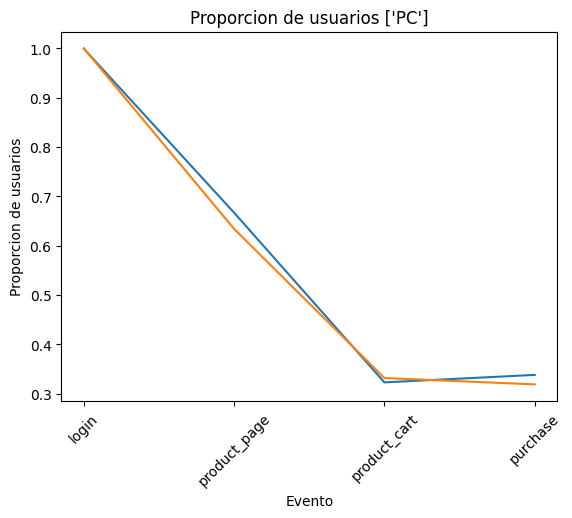

/.venv/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std


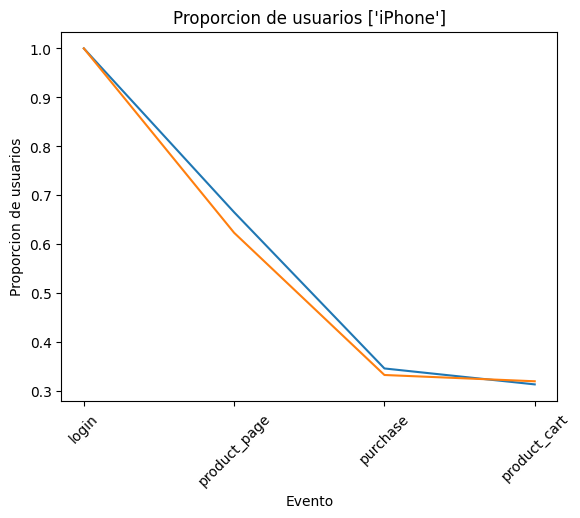

/.venv/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std


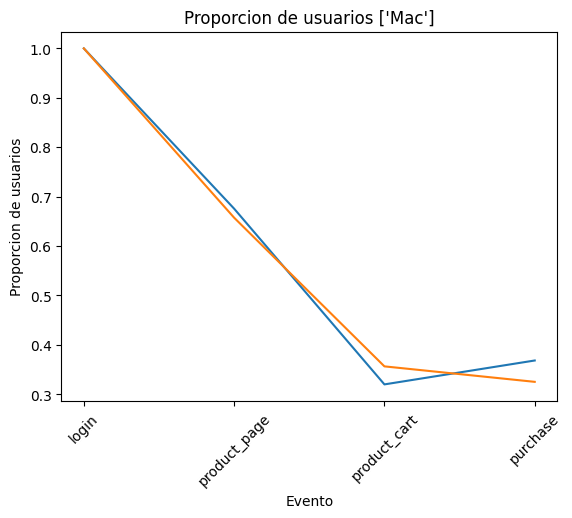

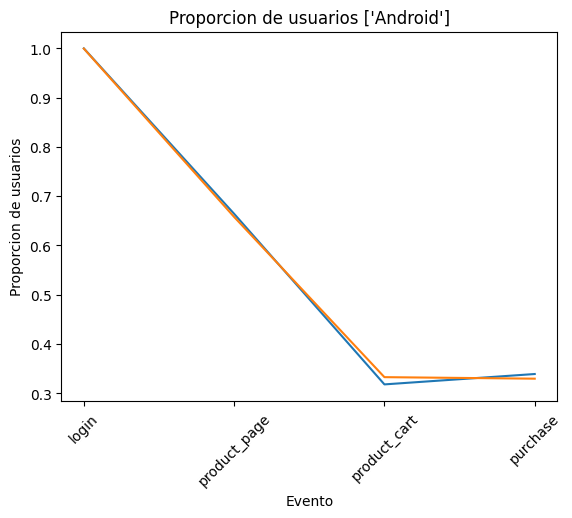

In [89]:
formula4(pc_df_A, pc_df_B)
formula4(iphone_df_A, iphone_df_B)
formula4(mac_df_A, mac_df_B)
formula4(android_df_A, android_df_B)

## Conclusion
Tras segmentar los datos por tipo de dispositivo solo se observo una diferencia significativa entre grupos A/B en iPhone, donde el grupo A presento una mejor tasa de retencion, sin embargo, estos datos no pueden considerarse confiables debido a los errores presentes en la implementacion de la prueba A/B

# Conclusion Final
Si bien el grupo A a primera vista presento mejor metricas, estas no pueden atribuirse a la prueba en si, debido a que se cometieron varios errores en la prueba, como la fecha en la que se ejecuto, la segmentacion de grupos A y B, que ademas de ser dispares, habia usuarios repetidos en ambos grupos, que probablemente hicieron algunos eventos en un grupo y los finalizaron en otros, aunque no se analizo, no se descarta incluso que esto tambien pasara a nivel de dispositivo, es decir, que realizaran unos eventos en un dispositivo y los finalizaran en otro (Algo que yo mismo he llegado a realizar debido a la presencia de descuentos cuando se realiza el pago en un dispositivo o simplemente porque tenia mis metodos de pago guardados en otro dispositivo). Bajo estas consideraciones no se pueden obetener conclusiones confiables.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Alexis! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Cargaste y exploraste los datos de manera efectiva, asegurándote de entender su estructura.<br>
• Convertiste columnas a tipos de datos apropiados, como datetime, para facilitar el análisis temporal.<br>
• Realizaste un análisis exploratorio detallado y filtraste datos de manera adecuada para evitar sesgos.<br>
• Implementaste visualizaciones efectivas para identificar patrones y diferencias entre grupos.<br>
• Aplicaste correctamente pruebas de hipótesis para evaluar diferencias significativas.<br>
• Identificaste usuarios en ambos grupos y tomaste medidas para corregir posibles sesgos.<br>
• Exploraste la distribución de eventos a lo largo del tiempo, proporcionando una visión temporal valiosa.<br>
• Comparaste la proporción de eventos entre grupos, destacando variaciones clave.<br>
• Evaluaste diferencias significativas por dispositivo, mostrando un enfoque analítico detallado.<br>
• Proporcionaste un análisis detallado de las tasas de conversión, utilizando técnicas estadísticas adecuadas.<br>
¡Felicidades!
</div>
